Na vytištění součástky na 3D tiskárně je potřeba $k$ metrů tiskové struny. Na tiskové struně se náhodně vyskytují vady, které způsobí ucpání trysky. Průměrná vzdálenost mezi vadami je $v$ metrů. Dojde-li během tisku k ucpání trysky, je tisk ukončen a součástka se tiskne celá znovu. Kolik materiálu se průměrě spotřebuje na vytištění jedné součástky (včetně neúspšných pokusů)? 

Předpokládáme, že výskyt vad na tiskové struně má charakter Poissonova procesu. Vzdálenosti mezi po sobě jdoucími vadami jsou proto vzájemně nezávislé náhodné celičiny s exponenciálním rozdělením se stř. hodnotou $1/v$.

K řešení použijeme metodu Monte Carlo. 

<br>

In [6]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import expon, norm

In [19]:
k = 60  # spotřeba
v = 40  # průměrná vzdálenost mezi vadami


In [20]:
# MC
N = 100000 # počet iterací MC
L = np.zeros(N)    # simulované hodnoty spotřeby na úsěšný výtisk
E = expon(scale=v)
for i in range(N):
    while True:
        t = E.rvs()  
        #print(i, t)
        if t<=k:
            L[i] = L[i]+t
        else:
            L[i] = L[i]+k
            break


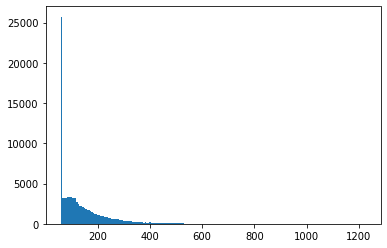

In [21]:
plt.hist(L, bins=200);

In [22]:
m = np.mean(L)   # výběrový průměr
s = np.std(L)    # výběrová směrodatná odchylka (odhad sm. odchylky) jedné spotřeby


In [32]:
c = 2
p = 1-2*norm.cdf(-c)
s_N = s/np.sqrt(N)   # přibližná směrodatná odchylka průměru
d = m-c*s_N          # dolní mez 
h = m+c*s_N          # horní mez

print("\n")
print("Odhad střední honoty spotřeby mnateriálu:")
print("\n")
print("P(I \u2208 <{:.3f}, {:.3f}>) \u2248 {:.3f}".format(m-c*s_N, m+c*s_N, p))
print("\n")

#print("\n")
#print("I \u2248 {:.3f} \u00B1 {:.3f}".format(m, c*s_N))
#print("\n")



Odhad střední honoty spotřeby mnateriálu:


P(I ∈ <138.463, 139.666>) ≈ 0.954




In [26]:
c*s_N/m

0.004326032758719547